## Polynomial Regression - cross validation with sklearn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [21]:
auto = pd.read_csv('Auto.csv')

In [22]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
# use horsepower as x-axis, mpg as y-axis
# note the data is NOT in ascending or descending order

In [24]:
hp = auto.horsepower
mpg = auto.mpg

In [25]:
hp.shape

(392,)

In [26]:
# needs to be reshaped, because it has 392 rows but 0 column

In [27]:
hp1 = hp.values.reshape(-1,1)
hp1.shape

(392, 1)

In [28]:
# linear regression

In [29]:
model1 = LinearRegression().fit(hp1,mpg)
yhat = model1.predict(hp1)

Text(0.5, 0, 'horsepower')

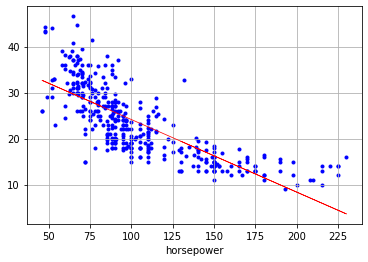

In [30]:
plt.scatter(hp,mpg,c = 'b', s = 9)
plt.plot(hp,yhat, c = 'r', lw = 0.75)
plt.grid()
plt.xlabel('horsepower')

In [31]:
# degree 2 polynomial

In [32]:
# get colums

In [33]:
poly2 = PolynomialFeatures(degree = 2)
hp2 = poly2.fit_transform(hp1)
hp2[:5]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.4000e+02, 1.9600e+04]])

In [34]:
np.set_printoptions(suppress = True)
hp2[:5]

array([[    1.,   130., 16900.],
       [    1.,   165., 27225.],
       [    1.,   150., 22500.],
       [    1.,   150., 22500.],
       [    1.,   140., 19600.]])

In [35]:
# 3rd column is horsepower^2

In [40]:
model2 = LinearRegression().fit(hp2,mpg)
yhat2 = model2.predict(hp2)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

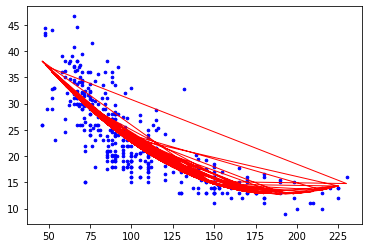

In [42]:
plt.scatter(hp,mpg,c = 'b', s = 7)
plt.plot(hp,yhat2,c = 'r', lw = 1)
plt.grid

In [43]:
# need to sort dataset by horsepower

In [45]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
d2 = auto.sort_values('horsepower')
d2[:5]
# sorting by horsepower

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
101,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
324,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
323,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
242,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel


In [70]:
mpg = d2.mpg
hp = d2.horsepower

In [71]:
hp1 = hp.values.reshape(-1,1)

In [72]:
poly2 = PolynomialFeatures(degree= 2)
hp2 = poly2.fit_transform(hp1)

In [73]:
model2 = LinearRegression().fit(hp2,mpg)
yhat = model2.predict(hp2)

Text(0, 0.5, 'mpg')

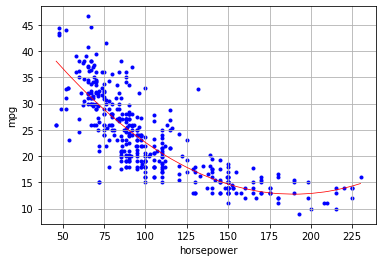

In [79]:
plt.scatter(hp,mpg,c = 'b', s = 9)
plt.plot(hp,yhat, c = 'r', lw = 0.75)
plt.grid()
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [64]:
# degree 5 regression

In [66]:
poly5 = PolynomialFeatures(degree = 5)
hp5 = poly5.fit_transform(hp1)
hp5[:5]

array([[1.00000000e+00, 4.60000000e+01, 2.11600000e+03, 9.73360000e+04,
        4.47745600e+06, 2.05962976e+08],
       [1.00000000e+00, 4.60000000e+01, 2.11600000e+03, 9.73360000e+04,
        4.47745600e+06, 2.05962976e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08]])

In [68]:
df5 = pd.DataFrame(hp5)
df5[:5]

,0,1,2,3,4,5
0,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
1,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
2,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
3,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
4,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0


In [75]:
model5 = LinearRegression().fit(hp5,mpg)
yhat5 = model5.predict(hp5)

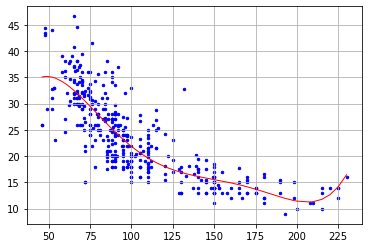

In [77]:
plt.scatter(hp,mpg,c = 'b', s = 6)
plt.plot(hp,yhat5,c = 'r', lw = 1)
plt.grid()

## make_pipeline(many models in a single step)

In [81]:
from sklearn.pipeline import make_pipeline

In [82]:
def PolynomialRegression (degree = 2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [83]:
hp = d2.horsepower.values.reshape(-1, 1)
mpg = d2.mpg

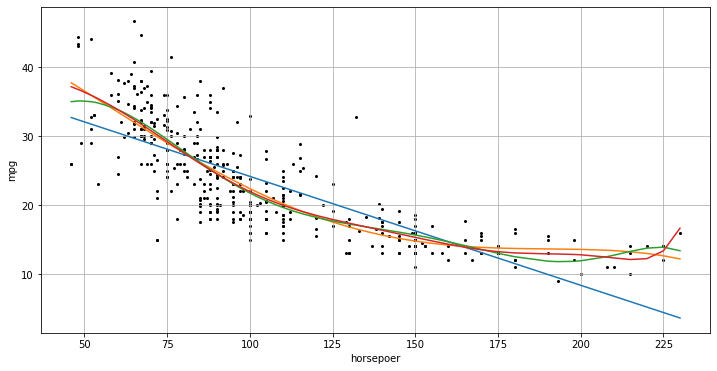

In [87]:
plt.figure(figsize = (12, 6))
plt.scatter(hp,mpg,c = 'k', s = 4)
plt.xlabel('horsepoer')
plt.ylabel('mpg')
plt.grid()

# fit models in a loop

for j in range(1,12,3):
    model = PolynomialRegression(degree = j).fit(hp,mpg)
    yhat = model.predict(hp)
    plt.plot(hp,yhat)
# starting from 1, increase by 3

## Validation Set approach

In [88]:
np.random.seed(9)

In [89]:
# select train rows

In [91]:
row_train = np.random.choice(391,196,replace = False)
row_train[:5]

array([287, 351, 105,   2, 354])

In [92]:
# train set

In [93]:
auto_train = auto.loc[row_train]
auto_train[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
287,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
351,32.4,4,108.0,75,2350,16.8,81,3,toyota corolla
105,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
354,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel


In [94]:
# test set

In [95]:
auto_test = auto.drop(row_train)
auto_test[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340


In [96]:
horsepower_train = auto_train['horsepower']
type(horsepower_train)

pandas.core.series.Series

In [97]:
# this is a dataframe with 1 column

In [98]:
horsepower_train = auto_train['horsepower'].values
type(horsepower_train)

numpy.ndarray

In [99]:
horsepower_train.shape

(196,)

In [101]:
horsepower_train = horsepower_train.reshape(-1,1)

In [102]:
horsepower_test = auto_train['horsepower'].values
horsepower_test = horsepower_test.reshape(-1,1)

In [103]:
# response

In [115]:
mpg_train = auto_train['mpg']
mpg_test = auto_test['mpg']

In [116]:
# degree 2

In [117]:
form = PolynomialFeatures(degree = 2)
horsepower_train2 = form.fit_transform(horsepower_train)
horsepower_test2 = form.fit_transform(horsepower_test)

In [118]:
pd.DataFrame(horsepower_train2[:5])

,0,1,2
0,1.0,155.0,24025.0
1,1.0,75.0,5625.0
2,1.0,180.0,32400.0
3,1.0,150.0,22500.0
4,1.0,80.0,6400.0


In [119]:
# fit

In [120]:
m2 = LinearRegression().fit(horsepower_train2,mpg_train)

In [121]:
prediction2 = m2.predict(horsepower_test2)

In [122]:
# mspe

In [124]:
m2_res2 = (mpg_test - prediction2) ** 2
m2_mspe = np.mean(m2_res2)
m2_mspe

105.05664922243905

In [125]:
# degree 5 

In [126]:
form = PolynomialFeatures(degree = 5)
horsepower_train5 = form_tranform(horsepower_train.reshape(-1,1))
horsepower_test5 = form.fit_transform(horsepower_test.reshape(-1,1))

NameError: name 'form_tranform' is not defined

In [127]:
m5 = LinearRegression().fit(horsepower_train5,mpg_train)

NameError: name 'horsepower_train5' is not defined

In [128]:
predition5 = m5.predict(horsepower_test5)

NameError: name 'm5' is not defined

In [129]:
m5_res2 = (mpg_test - predictions5)**2
m5_mspe = np.mean(m5_res2)
m5_mspe

NameError: name 'predictions5' is not defined